In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy as sc



plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.it"] = 'Arial:italic'
plt.rcParams["mathtext.rm"] = 'Arial'
plt.rcParams["mathtext.default"] = "it"

In [2]:
def fun_V_cyl_an(diameter, length):
    V_an = np.pi/4*diameter**2 * length
    return V_an



In [3]:
def fun_surface_old(r_i,r_j,length, angle1, angle2,y0, yd ):
    '''
    r_i = fixed
    r_j = fixed
    angle1 = fixed
    angle2 = fixed
    length = fixed

    y0 = not fixed
    yd = not fixed

    x = run variable
    '''

    #y0 = np.array([0,r_i])
    #yd = np.array([0,r_j])

    alpha_i = angle1 *np.pi/180
    alpha_j = angle2 *np.pi/180


    z1 = np.arcsinh(np.tan(-alpha_i))
    z2 = np.arcsinh(np.tan(alpha_j))


    a = -length / (z1 - z2)
    x_sp = (z1 *length) / (z1 - z2)
    b = y0 - a * np.cosh(z1)

    term1 = np.pi *y0**2
    term2 = np.pi *yd**2

    term3 = a**2*np.sinh(x_sp/a)*np.cosh(x_sp/a)/2 + a**2*np.sinh(length/a - x_sp/a)*np.cosh(length/a - x_sp/a)/2 + 2*a*b*np.sinh(x_sp/a) + 2*a*b*np.sinh(length/a - x_sp/a) - a*length*np.sinh(length/a - x_sp/a)**2/2 + a*length*np.cosh(length/a - x_sp/a)**2/2 + b**2*length/a

    return term1+term2+term3

In [4]:
def fun_surface(r_i,r_j,length, angle1, angle2,y_i,y_j ):
    '''
    r_i = fixed
    r_j = fixed
    angle1 = fixed
    angle2 = fixed
    length = fixed

    y0 = not fixed
    yd = not fixed

    x = run variable (not implemented)
    '''

    #y0 = np.array([0,r_i])
    #yd = np.array([0,r_j])


    db_i = y_i
    db_j = y_j

    contact_angle_i = angle1 *np.pi/180
    contact_angle_j = angle2 *np.pi/180

    beta_i = np.arcsin(db_i/r_i) * np.pi/180
    beta_j = np.arcsin(db_j/r_j) * np.pi/180

    z1 = np.arcsinh(-1/np.tan(beta_i+contact_angle_i))
    z2 = np.arcsinh(1/np.tan(beta_j+contact_angle_j))


    a = -length / (z1 - z2)
    x_sp = (z1 *length) / (z1 - z2)
    b = db_i - a * ((-1/np.tan(beta_i + contact_angle_i))**2+1)**0.5

    term1 = np.pi *y_i**2
    term2 = np.pi *y_j**2

    term3 = a**2*np.sinh(x_sp/a)*np.cosh(x_sp/a)/2 + a**2*np.sinh(length/a - x_sp/a)*np.cosh(length/a - x_sp/a)/2 + 2*a*b*np.sinh(x_sp/a) + 2*a*b*np.sinh(length/a - x_sp/a) - a*length*np.sinh(length/a - x_sp/a)**2/2 + a*length*np.cosh(length/a - x_sp/a)**2/2 + b**2*length/a

    return term1+term2+term3

In [5]:
def fun_vol_y_old(r_i,r_j,angle1,angle2, y_i,y_j, length):
    '''
    r_i = fixed
    r_j = fixed
    angle1 = fixed in °
    angle2 = fixed in °
    length = fixed

    y0 = not fixed
    yd = not fixed
    '''

    #alpha_i = np.arccos(db_i/(2*r_i))
    #alpha_j = np.arccos(db_j/2*r_j)

    # TODO: Check what kind of boundary is necessary for x or what is my variable
    #y0 = np.array([0,r_i])
    #yd = np.array([0,r_j])

    db_i = y_i
    db_j = y_j

    contact_angle_i = angle1 *np.pi/180
    contact_angle_j = angle2 *np.pi/180

    '''
    alpha_i = np.arccos(db_i/2*r_i) * np.pi/180
    alpha_j = np.arccos(db_j/2*r_j) * np.pi/180

    alpha_i = np.arccos(db_i/r_i) * np.pi/180
    alpha_j = np.arccos(db_j/r_j) * np.pi/180

    alpha_i = alpha_i + contact_angle_i
    alpha_j = alpha_j + contact_angle_j
    '''
    # TODO: Proof the angle calculation -- What kind of calculation is the rigth

    h_i = r_i - (r_i**2 - db_i**2)**0.5
    h_j = r_j - (r_j**2 - db_j**2)**0.5

    beta_i = np.arcsin(db_i/r_i) * np.pi/180
    beta_j = np.arcsin(db_j/r_j) * np.pi/180

    '''
    alpha_i = 90 * np.pi/180 - beta_i + contact_angle_i
    alpha_j = 90 * np.pi/180 - beta_j + contact_angle_j

    delta_i = np.arctan(db_i/(h_i + (r_i - r_i/np.cos(beta_i))))
    delta_j = np.arctan(db_j/(h_j + (r_j - r_j/np.cos(beta_j))))

    alpha_i = 90 * np.pi/180 - delta_i - contact_angle_i
    alpha_j = 90 * np.pi/180 - delta_j - contact_angle_j

    z1 = np.arcsinh(- np.tan(alpha_i))
    z2 = np.arcsinh(np.tan(alpha_j))

    '''
    z1 = np.arcsinh(-1/np.tan(beta_i+contact_angle_i))

    z2 = np.arcsinh(1/np.tan(beta_j+contact_angle_j))


    a = -length / (z1 - z2)
    x_sp = (z1 *length) / (z1 - z2)

    b = db_i - a * ((-1/np.tan(beta_i + contact_angle_i))**2+1)**0.5

    b = db_i - a * np.cosh()


    r_ij = (2*r_i*r_j)/(r_i+r_j)

    #TODO Proof if I should use Pythagoras or sin
    '''
    h_i = r_i - y0 / np.tan(alpha_i)
    h_j = r_j - yd / np.tan(alpha_j)
    '''

    l = length

    y_integral2 = a**3*np.sinh(x_sp/a)*np.cosh(x_sp/a)/2 + a**3*np.sinh(l/a - x_sp/a)*np.cosh(l/a - x_sp/a)/2 + 2*a**2*b*np.sinh(x_sp/a) + 2*a**2*b*np.sinh(l/a - x_sp/a) - a**2*l*np.sinh(l/a - x_sp/a)**2/2 + a**2*l*np.cosh(l/a - x_sp/a)**2/2 + b**2*l

    term3 = np.pi*r_ij**3/6 * (3*y_i**2 * h_i + h_i**3 + 3*y_j**2 *h_j +h_j**3) *r_ij**3

    volume = np.pi * y_integral2 - np.pi/6 * (3*y_i**2 * h_i + h_i**3 + 3*y_j**2 *h_j +h_j**3) * r_ij**3


    return volume, y_integral2, term3, r_ij


In [6]:
def fun_vol_y(r_i,r_j,angle1,angle2, y_i,y_j, length):
    '''
    r_i = fixed
    r_j = fixed
    angle1 = fixed in °
    angle2 = fixed in °
    length = fixed

    y_i = not fixed
    yd = not fixed
    '''

    #alpha_i = np.arccos(db_i/(2*r_i))
    #alpha_j = np.arccos(db_j/2*r_j)

    # TODO: Check what kind of boundary is necessary for x or what is my variable
    #y0 = np.array([0,r_i])
    #yd = np.array([0,r_j])

    db_i = y_i
    db_j = y_j

    contact_angle_i = angle1 * np.pi/180 # conversion degree to radian
    contact_angle_j = angle2 * np.pi/180 # conversion degree to radian

    h_i = r_i - (r_i**2 - db_i**2)**0.5
    h_j = r_j - (r_j**2 - db_j**2)**0.5
    '''
    beta_i = np.arcsin(db_i/r_i) * np.pi/180
    beta_j = np.arcsin(db_j/r_j) * np.pi/180
    '''
    beta_i = np.arcsin(db_i/r_i) # result in radian
    beta_j = np.arcsin(db_j/r_j) # result in radian

    #print(beta_i *180 / np.pi)
    #print(beta_j *180 / np.pi)

    if angle1 + np.arcsin(db_i/r_i) *180/np.pi > 89:
        print('error 1')

    if beta_i + contact_angle_i > 89:
        print('error 2')


    #print(beta_j * np.pi/180)

    z1 = np.arcsinh(-1/np.tan(beta_i+contact_angle_i))

    z2 = np.arcsinh(1/np.tan(beta_j+contact_angle_j))


    a = -length / (z1 - z2)
    x_sp = (z1 *length) / (z1 - z2)

    b = db_i - a * ((-1/np.tan(beta_i + contact_angle_i))**2+1)**0.5
    b = db_i

    r_ij = (2*r_i*r_j)/(r_i+r_j)

    l = length

    y_integral2 = a**3*np.sinh(x_sp/a)*np.cosh(x_sp/a)/2 + a**3*np.sinh(l/a - x_sp/a)*np.cosh(l/a - x_sp/a)/2 + 2*a**2*b*np.sinh(x_sp/a) + 2*a**2*b*np.sinh(l/a - x_sp/a) - a**2*l*np.sinh(l/a - x_sp/a)**2/2 + a**2*l*np.cosh(l/a - x_sp/a)**2/2 + b**2*l

    term3 = np.pi*r_ij**3 /6 * (3*y_i**2 * h_i + h_i**3 + 3*y_j**2 *h_j +h_j**3) *r_ij**3

    volume = np.pi * y_integral2 - np.pi/6 * (3*y_i**2 * h_i + h_i**3 + 3*y_j**2 *h_j +h_j**3) * r_ij**3


    return volume, y_integral2, term3, r_ij


In [7]:
def fun_y(angle1 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x):

    contact_angle_i = angle1 *np.pi/180
    contact_angle_j = angle2 *np.pi/180

    '''
    beta_i = np.arcsin(db_i/r_i) * np.pi/180
    beta_j = np.arcsin(db_j/r_j) * np.pi/180
    '''


    beta_i = np.arcsin(db_i/r_i)
    beta_j = np.arcsin(db_j/r_j)



    if angle1 + np.arcsin(db_i/r_i) *180/np.pi > 80:
        print('error 1')

    if beta_i + contact_angle_i > 80:
        print('error 2')

    z1 = np.arcsinh(-1/np.tan(beta_i+contact_angle_i))
    z2 = np.arcsinh(1/np.tan(beta_j+contact_angle_j))

    d = length

    a = -d / (z1 - z2)
    xsp = (z1 *d) / (z1 - z2)
    b = db_i - a * np.cosh(z1)
    b = db_i

    yx = a *np.cosh((x-xsp)/a) + b
    return yx



error 1


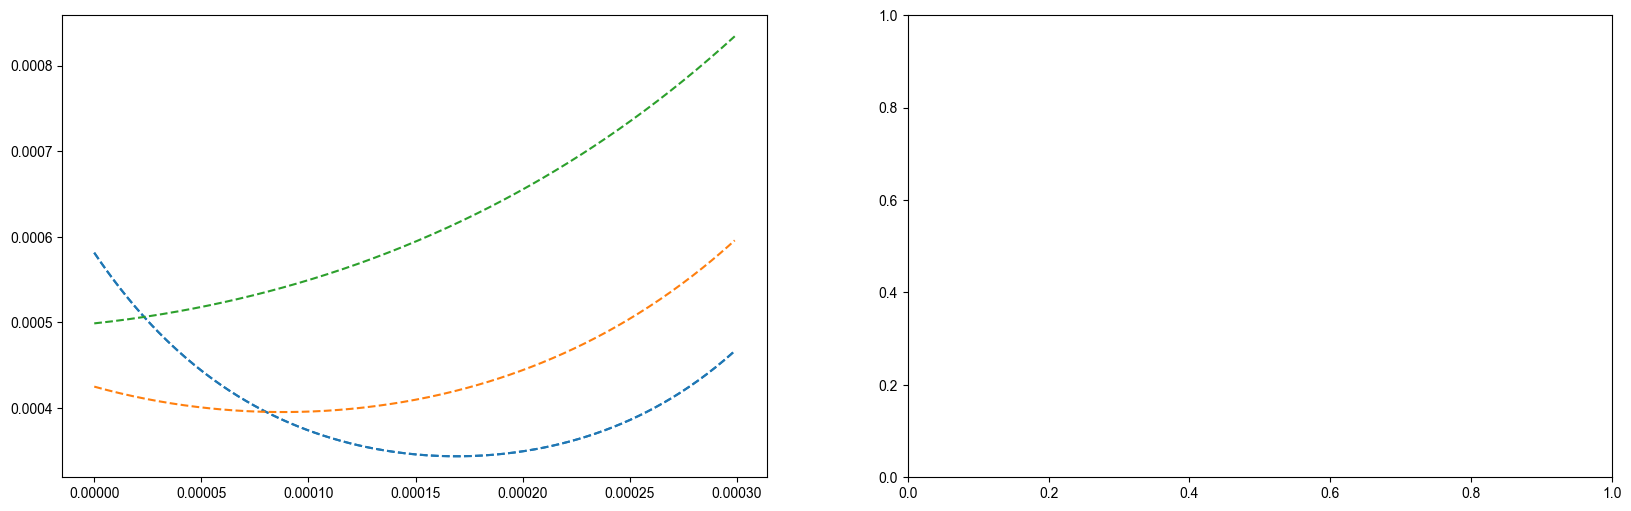

In [8]:
r_i = 1e-3
r_j = 2e-3



angle1 = 0
angle2 = 0


y0 = 0.26e-3
yd = 0.8e-3

db_i = y0
db_j = yd

length = 0.3e-3
x = np.arange(0,length,1e-6)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax[0].plot(x, fun_y(angle1 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:blue")

ax[0].plot(x, fun_y(angle1 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:blue")
ax[0].plot(x, fun_y(40 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:orange")
ax[0].plot(x, fun_y(90 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:green")

#ax[1].plot(x, fun_y(45 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:blue")

if 0:

    ax[1].plot(x, fun_y(90 ,angle2 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:blue")
    ax[1].plot(x, fun_y(0 ,90 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:orange")
    #ax[1].plot(x, fun_y(90 ,90 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:green")
    ax[1].plot(x, fun_y(45 ,45 ,length ,db_i, db_j, r_i, r_j ,x),"--",color="tab:red")

In [161]:
np.tan(45*np.pi/180)

0.9999999999999999

In [162]:
r_i = 1e-3
r_j = 2e-3


angle1 = 0
angle2 = 0


y0 = 0.26e-3
yd = 0.8e-3

#y0 = 1e-3
#yd = 2e-3

length = 0.3e-3



#fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)
fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]


15.07006214488883
23.578178478201835


1.5387096806982454e-10

In [165]:
print(fun_vol_y(r_i,r_j,0,0, y0,yd, length)[0])
print('-------------------------------------------')
print(fun_vol_y(r_i,r_j,50,0, y0,yd, length)[0])
print('-------------------------------------------')
print(fun_vol_y(r_i,r_j,0,50, y0,yd, length)[0])
print('-------------------------------------------')
print(fun_vol_y(r_i,r_j,50,50, y0,yd, length)[0])

15.07006214488883
23.578178478201835
1.5387096806982454e-10
-------------------------------------------
15.07006214488883
23.578178478201835
2.061028113217718e-10
-------------------------------------------
15.07006214488883
23.578178478201835
2.317292545375702e-10
-------------------------------------------
15.07006214488883
23.578178478201835
4.307371403236839e-10


In [34]:
r_i = 1e-3
r_j = 2e-3

r_ij = (2*r_i*r_j)/(r_i+r_j)

V = 0.03

v = V * r_ij**3

v

7.11111111111111e-11

In [9]:

#fun_V_cyl_an(0.16* potenz, 0.52* potenz)

fun_V_cyl_an(2*yd, length)

3.769911184307751e-09

In [98]:
potenz = 1e-3
r_i = 1 * potenz
r_j = 2 * potenz



angle1 = 0
angle2 = 0

y0 = 0.6 * potenz
yd = 0.8 * potenz

length = 0.3 * potenz



#y0 = 2
#yd = 1

#length = 2


#fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)
fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]

4.0981595904744223e-16

In [99]:
fun_V_cyl_an(2*yd, length)

6.031857894892402e-10

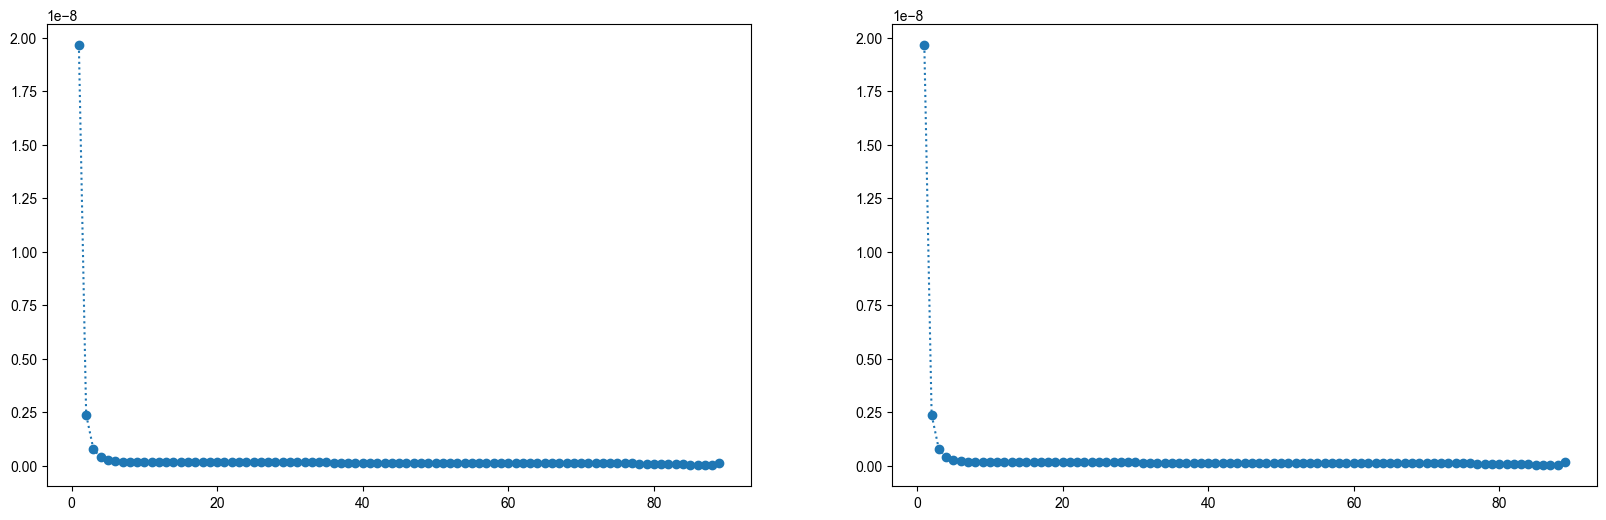

In [119]:
angle1 = np.arange(1,90,1)
#angle2 = np.arange(1,90,1)

# angle2 = 45

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

#for i in range(len(angle2)):
 #   volume = fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]
  #  ax[0].plot(angle1, volume,"o:",color="tab:blue")


#volume = fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]

volume = fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]

ax[0].plot(angle1, volume,"o:",color="tab:blue")


#ax[0].plot(angle1, fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0],"o:",color="tab:blue")

ax[1].plot(angle1, fun_vol_y(r_i,r_j,angle1,40, y0,yd, length)[0],"o:",color="tab:blue")

--------------------
-5561.953781920877
########################################
161.9533211013912
-5561.953781920877
161.9533211013912
40


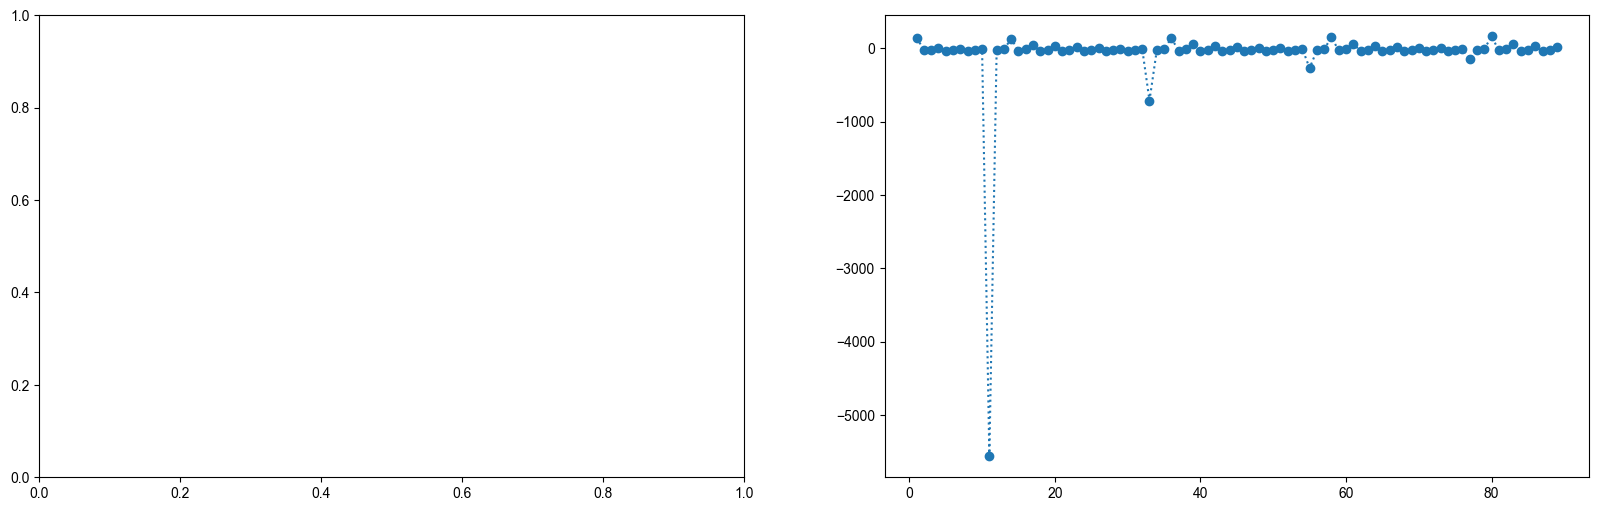

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

angle_tag1 = False
angle_tag2 = True


if angle_tag1:
    angle1 = np.arange(1,90,1)
    angle2 = 40

    for i in range(len(angle1)):
        print(angle1[i])
        print('--------------------')
        print(np.min(fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]))
        print('########################################')
    volume = fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]
    ax[0].plot(angle1, volume,"o:",color="tab:blue")
    print('########################################')
    print(volume)


if angle_tag2:
    angle1 = 40
    angle2 = np.arange(1,90,1)

    #print(angle2[i])
    print('--------------------')
    print(np.min(fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]))
    print('########################################')
    print(np.max(fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]))
   # print('########################################')
    volume = fun_vol_y(r_i,r_j,angle1,angle2, y0,yd, length)[0]
    ax[1].plot(angle2, volume,"o:",color="tab:blue")

    print(np.min(volume))
    print(np.max(volume))
    print(angle1)
   # print(volume)

In [82]:
angle2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])

In [93]:
np.sin(1/2 *np.pi)

1.0

In [101]:
np.arctan(45*np.pi/180)

0.6657737500283538

In [103]:
np.tan(45*np.pi/180)

0.9999999999999999

In [97]:
angle1

50

In [62]:
np.sinh(1)

1.1752011936438014

In [63]:
np.cosh(1)

1.5430806348152437